# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

**Tecnológico de Monterrey**

Prof Luis Eduardo Falcón Morales

Actividad de Semanas 3 y 4

**Rotación de Personal - IBM**

#### **Nombres y matrículas:**

+ Eduardo Selim Martínez Mayorga - A01795167
+ Víctor Alfonso Rosales Soto - A01114509

#### **La siguiente actividad se basa en los datos del archivo "WA_Fn-UseC_-HR-Employee-Attrition.csv" que se encuentra en la siguiente liga de Kaggle, llamada "IBM HR Analytics Employee Attrition & Performance":**

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [1]:
# Incluye aquí todas las librerías que consideres necesarias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline, FeatureUnion



from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score


from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel

# **Ejercicio 1:**

#### **Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).**

++++++++ Inicia la sección de agregar texto: ++++++++++++

Se entiende con Problema de Rotación de Personal a la problemática que enfrentan las empresas con relación a la renuncia voluntaria realizada por los colaboradores, afectando con esto al funcionamiento de la misma al debilitar la estructura requerida para operar, además de conllevar inversiones realizadas previamente en concepto de capacitación y más aún en Conocimiento que se pierde ante esta ruptura laboral.

++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 2:**

#### **Carga los datos del archivo de la página de Kaggle indicada como un DataFrame de Pandas, llamado "df" y utilicemos el método “describe” con el argumento include= “all”, para obtener una primera descripción general de cada variable.**

Observación: Estamos trabajando en equipo local, no en Google Colab

In [2]:
# ++++++++++++++ Inicia sección de agregar código ++++++++++++++++++++

# El archivo "WA_Fn-UseC_-HR-Employee-Attrition.csv" se encuentra en la misma
# carpeta que este Jupyter Notebook
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Se verifica la lectura y definición del dataframe
df.head()
# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
print("Tamaño del DataFrame:", df.shape)
df.describe(include = 'all').T

Tamaño del DataFrame: (1470, 35)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


# **Ejercicio 3:**

#### **Indica cuál es la diferencia entre utilizar o no el argumento include=”all” del método "describe" en el ejercicio anterior.**

++++++++ Inicia la sección de agregar texto: ++++++++++++

El parámetro "all" genera la instrucción para genere estadísticos
de las variables del tipo numérico y también del tipo categórico, a diferencia del argumento "None", que sólo incluye los estadísticos del tipo numérico.

++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 4:**

#### **Con base a la información desplegada por la instrucción anterior, hemos decidido cancelar los siguientes factores de nuestro problema: Over18, EmployeeCount, StandardHours, EmployeeNumber. Explica cuál es la justificación que nos permite cancelar cada uno de estos factores:**

In [4]:
variables_a_cancelar = ['Over18', 'EmployeeCount',
                       'StandardHours', 'EmployeeNumber']

df[variables_a_cancelar].describe(include = 'all')

,Over18,EmployeeCount,StandardHours,EmployeeNumber
count,1470,1470.0,1470.0,1470.000000
unique,1,NaN,NaN,NaN
top,Y,NaN,NaN,NaN
freq,1470,NaN,NaN,NaN
mean,NaN,1.0,80.0,1024.865306
std,NaN,0.0,0.0,602.024335
min,NaN,1.0,80.0,1.000000
25%,NaN,1.0,80.0,491.250000
50%,NaN,1.0,80.0,1020.500000
75%,NaN,1.0,80.0,1555.750000


++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)   Over18**: No proporciona información adicional ya que sólo existe la categoría 'Yes' ('Y'). Pues la variable toma un único valor tantas veces como el número de observaciones.

**b)	EmployeeCount**: No proporciona información adicional, ya que sólo representa un número asociado a la cantidad de veces que aparece el empleado. La media, el mínimo y el máximo son 1 y hay desviación estándar de 0.

**c)	StandardHours**: No proporciona información adicional ya que todos los empleados trabajan 80 horas. La media, el mínimo y el máximo son 80 y hay desviación estándar de 0.

**d)	EmployeeNumber**: No proporciona información adicional, al menos para este análisis ya que se vuelve una variable interna de los sistemas para guardar/identificar de manera única a un empleado en particular.

++++++++ Termina la sección de agregar texto. +++++++++++




In [5]:
# Eliminamos los factores indicados:

df = df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],
             axis=1)

print("Tamaño del nuevo DataFrame:", df.shape)

Tamaño del nuevo DataFrame: (1470, 31)


In [6]:
# Se verifica visualmente
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


# **Ejercicio 5:**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [9]:
lista_numericas = df.describe().columns.tolist()
lista_numericas

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [10]:
lista_categoricas = df.describe(include = 'object').columns.tolist()
lista_categoricas

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

Se verifica que ambas listas sean exhaustivas:

In [11]:
len(lista_numericas) + len(lista_categoricas)

31

Que es precisamente el número de variables que tiene el DataFrame

Analizaremos las variables categóricas:

In [12]:
resumen_categoricas = df[lista_categoricas].describe().T
resumen_categoricas

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


Se puede observar que las variables 'Attrition', 'Gender' y 'OverTime' son binarias.

In [13]:
otras_categoricas = ['BusinessTravel','Department', 
                     'EducationField', 'JobRole',  'MaritalStatus']

otras_categoricas

['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

In [14]:
for variable in otras_categoricas:
    print(variable)
    print(df[variable].value_counts())
    print('---')

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
---
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
---
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
---
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
---
MaritalStatus
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
---


De estas variables categóricas, la única que se puede considerar categórica ordinal es 'BusinessTravel'

In [15]:
columnas_numericas = lista_numericas
columnas_binarias = ['Attrition', 'Gender', 'OverTime']
columnas_ordinales = ['BusinessTravel']

s = set(columnas_binarias + columnas_ordinales)
columnas_nominales = [x for x in lista_categoricas if x not in s]

columnas_nominales

['Department', 'EducationField', 'JobRole', 'MaritalStatus']

Se verifica que el listado sea exhaustivo:

In [16]:
len(columnas_numericas) + len(columnas_binarias) + len(columnas_ordinales) + len(columnas_nominales)

31

Que coincide efectivamente con el número de columnas del dataframe

Ahora analizaremos las variables numéricas. Se empezará con algunos histogramas:

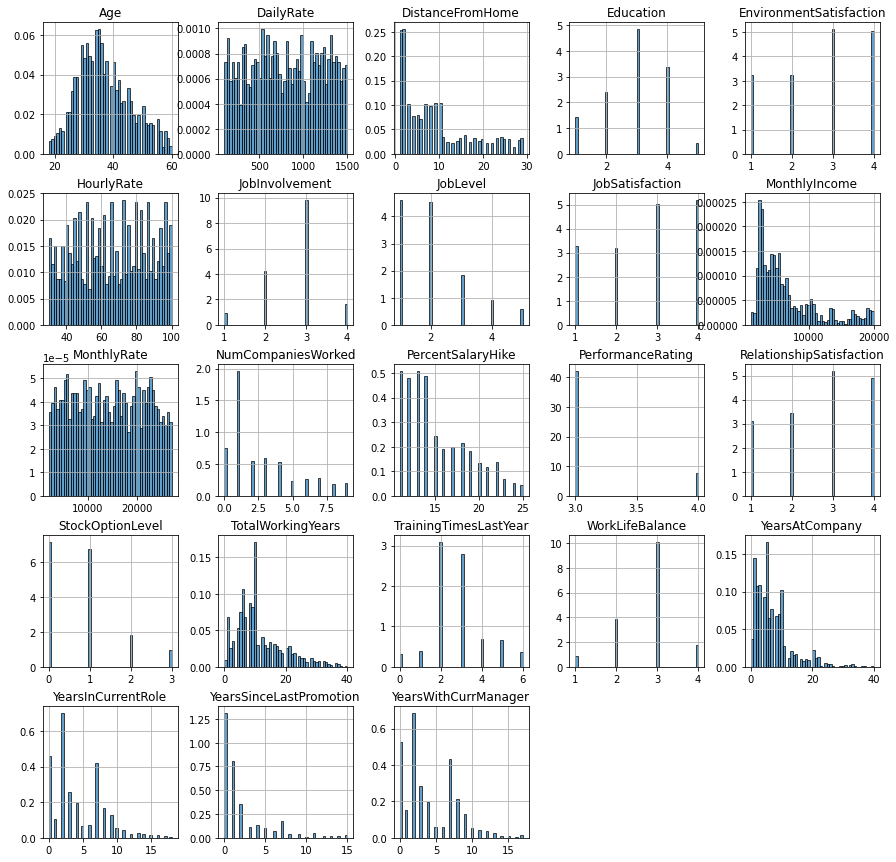

In [17]:
df[columnas_numericas].hist(figsize= (15,15), bins= 50,
                            density = True, alpha = 0.7,
                            edgecolor = 'black');

Se puede observar que las variables 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance' aunque están codificadas como numéricas, sólo toman unos pocos valores. Esto sugiere que son variables que están codificadas con números pero cada número representa una categoría.

In [18]:
posibles_categoricas = ['Education', 'EnvironmentSatisfaction',
                        'JobInvolvement', 'JobLevel',
                        'JobSatisfaction', 'PerformanceRating',
                        'RelationshipSatisfaction', 'StockOptionLevel',
                        'WorkLifeBalance']

for variable in posibles_categoricas:
    print(variable)
    print(df[variable].value_counts())
    print('---')

Education
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64
---
EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64
---
JobInvolvement
3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64
---
JobLevel
1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64
---
JobSatisfaction
4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64
---
PerformanceRating
3    1244
4     226
Name: PerformanceRating, dtype: int64
---
RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64
---
StockOptionLevel
0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64
---
WorkLifeBalance
3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64
---


De hecho, si vamos a la descripción del Dataset de Kaggle nos encontramos:

Education:
+ 1 'Below College'
+ 2 'College'
+ 3 'Bachelor'
+ 4 'Master'
+ 5 'Doctor'

EnvironmentSatisfaction:
+ 1 'Low'
+ 2 'Medium'
+ 3 'High'
+ 4 'Very High'

JobInvolvement:
+ 1 'Low'
+ 2 'Medium'
+ 3 'High'
+ 4 'Very High'

JobSatisfaction:
+ 1 'Low'
+ 2 'Medium'
+ 3 'High'
+ 4 'Very High'

PerformanceRating:
+ 1 'Low'
+ 2 'Good'
+ 3 'Excellent'
+ 4 'Outstanding'

RelationshipSatisfaction:
+ 1 'Low'
+ 2 'Medium'
+ 3 'High'
+ 4 'Very High'

WorkLifeBalance:
+ 1 'Bad'
+ 2 'Good'
+ 3 'Better'
+ 4 'Best'

In [19]:
s = set(posibles_categoricas)
columnas_numericas_actualizada = [x for x in columnas_numericas if x not in s]

In [20]:
columnas_numericas_actualizada

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [21]:
columnas_numericas = columnas_numericas_actualizada
columnas_ordinales = columnas_ordinales + posibles_categoricas

In [22]:
columnas_numericas

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [23]:
columnas_ordinales

['BusinessTravel',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

Se verifica que el listado sea exhaustivo:

In [24]:
len(columnas_numericas) + len(columnas_binarias) + len(columnas_ordinales) + len(columnas_nominales)

31

Que coincide efectivamente con el número de columnas del dataframe

In [25]:
cols_cat = columnas_binarias + columnas_nominales + columnas_ordinales
cols_cat

['Attrition',
 'Gender',
 'OverTime',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'BusinessTravel',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

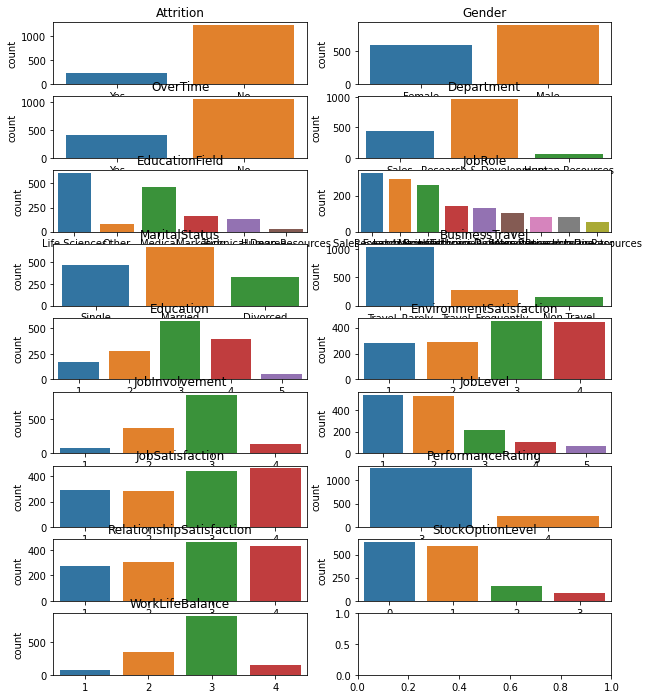

In [26]:
# Validamos el tipo de columnas categóricas:

fig, axes = plt.subplots(9,2, figsize = (10,12))
axes = axes.ravel()
for col, ax in zip(df[cols_cat], axes):
  sns.countplot(x = df[col], ax = ax)
  ax.set(title = f'{col}', xlabel = None)

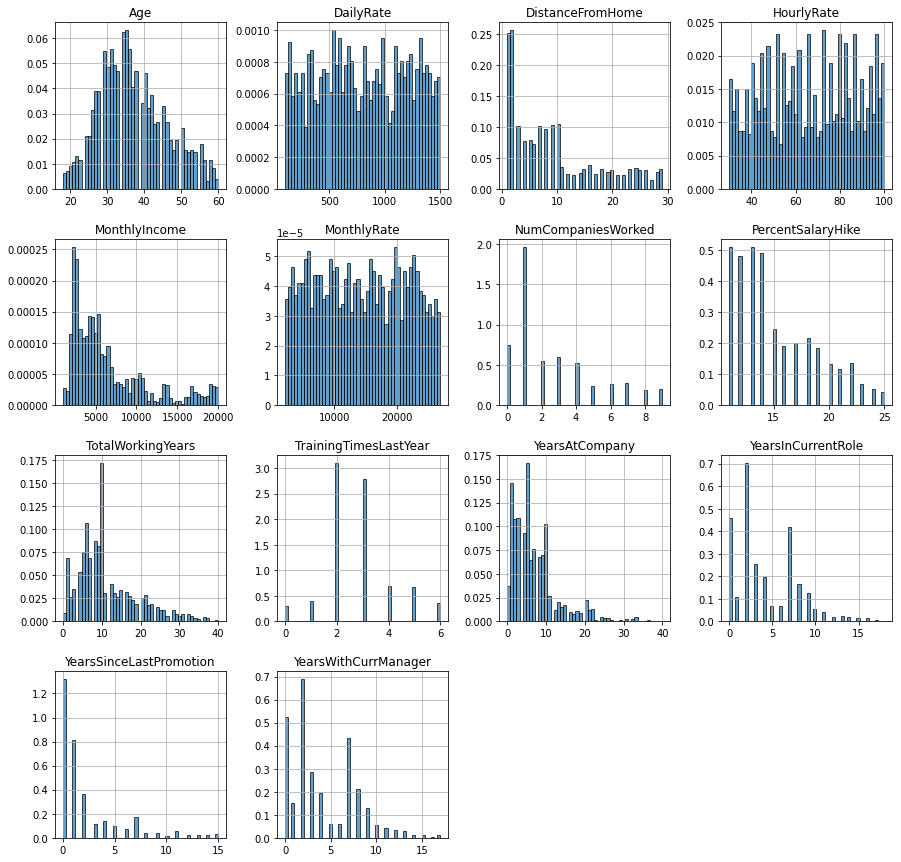

In [27]:
df[columnas_numericas].hist(figsize= (15,15), bins= 50,
                            density = True, alpha = 0.7,
                            edgecolor = 'black');

#### **Realiza los análisis necesarios para encontrar cuántas y cuáles de las variables del nuevo DataFrame son:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

i. variables numéricas de valor entero:

In [28]:
columnas_numericas

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [29]:
print("El número variables numéricas de valor entero es: ",
      len(columnas_numericas))

El número variables numéricas de valor entero es:  14


ii. variables numéricas de valor real (flotante):

No hay variables númericas de valor real (flotante)

iii. variables binarias:

In [30]:
columnas_binarias

['Attrition', 'Gender', 'OverTime']

In [31]:
print("El número variables binarias es: ",
      len(columnas_binarias))

El número variables binarias es:  3


iv.	variables categóricas nominales. Indica el total de niveles que tiene cada una de estas variables:

In [32]:
columnas_nominales

['Department', 'EducationField', 'JobRole', 'MaritalStatus']

In [33]:
print("El número variables nominales es: ",
      len(columnas_nominales))

El número variables nominales es:  4


In [34]:
#Niveles de las columnas nominales:
for column in columnas_nominales:
  value_counts = df[column].value_counts()
  print(f"Valores para cada columna nominal '{column}' :\n{value_counts}\n")

Valores para cada columna nominal 'Department' :
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Valores para cada columna nominal 'EducationField' :
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Valores para cada columna nominal 'JobRole' :
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Valores para cada columna nominal 'MaritalStatus' :
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64



v. variables categóricas ordinales. Indica el total de niveles que tiene cada una de estas variables:

In [35]:
columnas_ordinales

['BusinessTravel',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

In [36]:
print("El número variables ordinales es: ",
      len(columnas_ordinales))

El número variables ordinales es:  10


In [37]:
#Niveles de las columnas ordinales:
for column in columnas_ordinales:
  value_counts = df[column].value_counts()
  print(f"Valores para cada columna ordinal '{column}' :\n{value_counts}\n")

Valores para cada columna ordinal 'BusinessTravel' :
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Valores para cada columna ordinal 'Education' :
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

Valores para cada columna ordinal 'EnvironmentSatisfaction' :
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

Valores para cada columna ordinal 'JobInvolvement' :
3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

Valores para cada columna ordinal 'JobLevel' :
1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

Valores para cada columna ordinal 'JobSatisfaction' :
4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

Valores para cada columna ordinal 'PerformanceRating' :
3    1244
4     226
Name: PerformanceRating, dtype: int64

Valores para cada columna ordinal 'RelationshipSatisfaction' :
3    459
4    

++++++++ Termina la sección de agregar texto: ++++++++++++

# **Ejercicio 6:**

#### **Realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y 15%, respectivamente. Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente. Asegúrate que dicha partición conserve la estratificación de las clases de la variable “Attrition”. Despliega además la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.**

In [38]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df = df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],
             axis=1)

Para ver la proporción de valores de la variable 'Attrition':

In [39]:
(df['Attrition'].value_counts())/len(df)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [40]:
# Se consruye el dataset de las POSIBLES variables predictoras
X = df.drop(['Attrition'], axis=1)

# Se consruye el dataset de la variable de salida
y = df['Attrition']

#Particionamos 70% Train y 30% una temporal para volverla a dividir
Xtrain, Xtemp, ytrain, ytemp = train_test_split(X, y,
                                                train_size = 0.7,
                                                random_state = 1,
                                                stratify = y)

#Particionamos el 30% en 50% validación y 50% en test.
Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp,
                                            train_size = 0.5,
                                            random_state = 1,
                                            stratify = ytemp)

Verificamos la proporción de 'Yes' en el dataset de entrenamiento

In [41]:
ytrain.value_counts()/len(ytrain)

No     0.838678
Yes    0.161322
Name: Attrition, dtype: float64

Verificamos la proporción de 'Yes' en el dataset de validación

In [42]:
yval.value_counts()/len(yval)

No     0.840909
Yes    0.159091
Name: Attrition, dtype: float64

Verificamos la proporción de 'Yes' en el dataset de prueba

In [44]:
ytest.value_counts()/len(ytest)

No     0.837104
Yes    0.162896
Name: Attrition, dtype: float64

En los tres casos se guarda la proporción de 'Yes' aproximada del 16%

# **Ejercicio 7:**


#### **Aplica la transformación LabelEncoder() de sklearn a la variable de salida “Attrition”. Las variables deberán seguir llamándose igual: ytrain, yval, ytest. Encuentra la proporción de datos en cada nivel de esta variable y con base a dicha información indica si podemos considerar que tenemos un problema de datos desbalanceados.**

#### NOTA: Aplica esta transformación evitando el filtrado de información (data leakage).

In [45]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++

label_encoder = LabelEncoder()

ytrain  = label_encoder.fit_transform(ytrain)
yval  = label_encoder.fit_transform(yval)
ytest  = label_encoder.fit_transform(ytest)

ytrain =  pd.DataFrame(ytrain)
yval =  pd.DataFrame(yval)
ytest =  pd.DataFrame(ytest)

print("Valores únicos en ytrain :\n",ytrain[0].value_counts() / sum(ytrain[0].value_counts()))
print("Valores únicos en yval :\n", yval[0].value_counts() / sum(yval[0].value_counts()))
print("Valores únicos en ytest :\n", ytest[0].value_counts() / sum(ytest[0].value_counts()))

# +++++++++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

Valores únicos en ytrain :
 0    0.838678
1    0.161322
Name: 0, dtype: float64
Valores únicos en yval :
 0    0.840909
1    0.159091
Name: 0, dtype: float64
Valores únicos en ytest :
 0    0.837104
1    0.162896
Name: 0, dtype: float64


**Respuesta:** Considerando la proporción de las respuestas, 84% etiqueta 0, y 16% etiqueta 1, **SÍ** se considera que este conjunto de datos tienen datos desbalanceados.

# **Ejercicio 8:**


#### **Usando solamente el conjunto de Entrenamiento, obtener los histogramas de las variables numéricas. Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en dichas variables?**

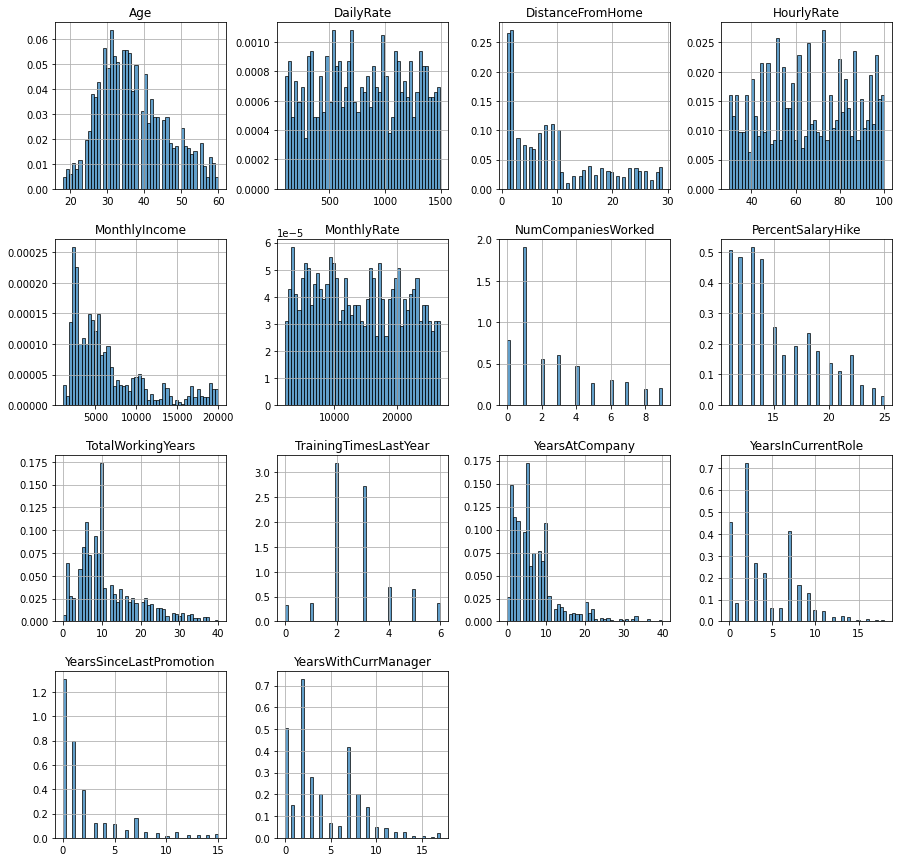

In [46]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++

Xtrain[columnas_numericas].hist(figsize= (15,15), bins= 50,
                                density = True, alpha = 0.7,
                                edgecolor = 'black');

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

Por el tipo de sesgo recomendamos aplicar las siguientes transformaciones:

**Sesgo Positivo: Aplicar logaritmo o raíz cuadrada :**

- Distance from Home
- Monthly Income
- Percent Salary Hike
- Total Working Years
- Years at Company
- Years Since Last Promotion
- Years With Current Manager

# **Ejercicio 9:**

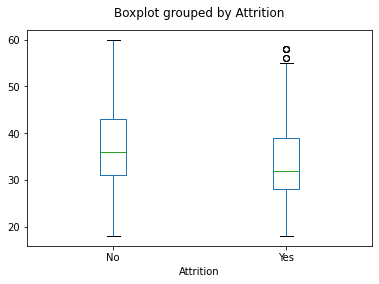

In [47]:
graf = df.boxplot(by = 'Attrition',
           column = ['Age'],
           grid = False)

# Axis details
graf.set_title(" ");

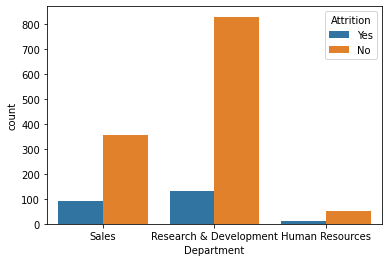

In [48]:
sns.countplot(x="Department",
              data=df,
              hue = "Attrition");

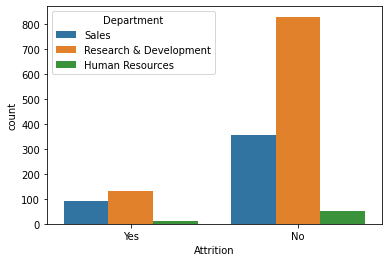

In [49]:
sns.countplot(x="Attrition",
              data=df,
              hue = "Department");

In [50]:
pd.crosstab(df['Attrition'], df['Department'],
            normalize='columns', margins = False) 

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,0.809524,0.861602,0.793722
Yes,0.190476,0.138398,0.206278


In [51]:
pd.crosstab(df['Attrition'], df['Department'],
            normalize='index', margins = False) 

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,0.041363,0.671533,0.287105
Yes,0.050633,0.561181,0.388186


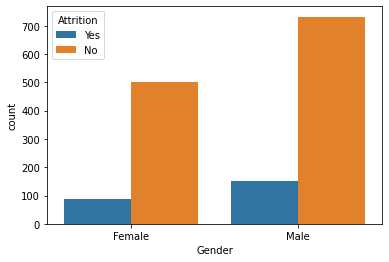

In [52]:
sns.countplot(x="Gender",
              data=df,
              hue = "Attrition");

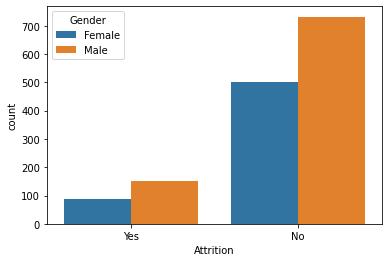

In [53]:
sns.countplot(x="Attrition",
              data=df,
              hue = "Gender");

In [54]:
pd.crosstab(df['Attrition'], df['Gender'],
            normalize='columns', margins = False) 

Gender,Female,Male
Attrition,,
No,0.852041,0.829932
Yes,0.147959,0.170068


In [55]:
pd.crosstab(df['Attrition'], df['Gender'],
            normalize='index', margins = False) 

Gender,Female,Male
Attrition,,
No,0.406326,0.593674
Yes,0.367089,0.632911


#### **Se pueden analizar una buena cantidad de factores para buscar relaciones entre los factores y la variable de salida “Attrition”, la decisión de dejar un puesto. En particular, deberás ilustrar gráficamente la relación entre las siguientes variables, las cuales pueden aportar información al problema que estamos enfrentando de rotación de personal.**

a)	Las variables “Age” y “Attrition”.

b)	Las variables “Department” y “Attrition”.

c)	Las variables “Gender” y “Attrition”.

d)	Incluye alguna otra relación o relaciones que consideres relevantes.

e)	Con base a los gráficos obtenidos incluye tus conclusiones al respecto.


In [56]:
cols_cat = columnas_binarias + columnas_nominales + columnas_ordinales
df[cols_cat] = df[cols_cat].astype('category')

In [57]:
# Incluye a continuación todas las celdas de código y/o texto que consideres
# adecuadas para responder a la pregunta de este ejercicio.

None



# **Ejercicio 10:**

#### **Encontrar la matriz de correlación de Pearson entre variables numéricas y a partir de dicha matriz encuentra aquellas correlaciones fuertes, positivas o negativas.**

**NOTA: Decimos que una correlación es fuerte cuando el valor absoluto es mayor a 0.7.**


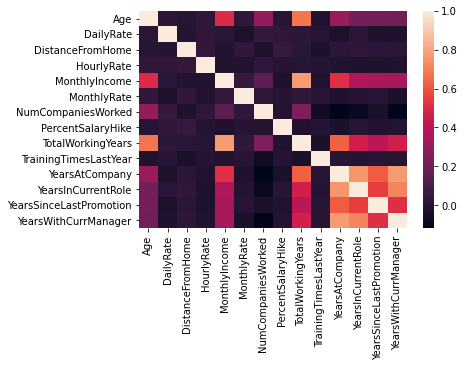

In [58]:
# Incluye a continuación todas las celdas de código y/o texto que consideres
# adecuadas para responder a la pregunta de este ejercicio.

# Se construye el mapa de calor a partir de las correlaciones
sns.heatmap(df.corr());

In [59]:
# Se obtiene la matriz de correlaciones
matriz_corr = df.corr()
matriz_corr[matriz_corr >= 0.7]

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HourlyRate,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyIncome,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.772893,NaN,NaN,NaN,NaN,NaN
MonthlyRate,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumCompaniesWorked,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PercentSalaryHike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
TotalWorkingYears,NaN,NaN,NaN,NaN,0.772893,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
TrainingTimesLastYear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [60]:
c = df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

In [61]:
so[so >= 0.7]

YearsInCurrentRole       YearsWithCurrManager       0.714365
YearsWithCurrManager     YearsInCurrentRole         0.714365
YearsAtCompany           YearsInCurrentRole         0.758754
YearsInCurrentRole       YearsAtCompany             0.758754
YearsAtCompany           YearsWithCurrManager       0.769212
YearsWithCurrManager     YearsAtCompany             0.769212
MonthlyIncome            TotalWorkingYears          0.772893
TotalWorkingYears        MonthlyIncome              0.772893
Age                      Age                        1.000000
YearsInCurrentRole       YearsInCurrentRole         1.000000
YearsAtCompany           YearsAtCompany             1.000000
TrainingTimesLastYear    TrainingTimesLastYear      1.000000
TotalWorkingYears        TotalWorkingYears          1.000000
PercentSalaryHike        PercentSalaryHike          1.000000
NumCompaniesWorked       NumCompaniesWorked         1.000000
MonthlyRate              MonthlyRate                1.000000
MonthlyIncome           

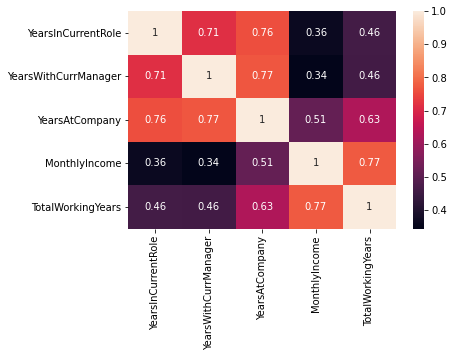

In [62]:
alta_corr = ['YearsInCurrentRole', 'YearsWithCurrManager',
             'YearsAtCompany', 'MonthlyIncome', 'TotalWorkingYears']

# Pero se le agregan las leyendas de las correlaciones
# para mejor visualización
sns.heatmap(df[alta_corr].corr(), annot=True);

# **Ejercicio 11:**

#### **Utiliza las clases Pipeline y ColumnTransformer de Sklearn para definir las transformaciones que deberán aplicarse a cada variable de acuerdo a su tipo.**

**NOTA: A las variables numéricas aplica las transformaciones que hayas decidido en el Ejercicio 8; a las variables binarias y nominales puedes aplicarles las transformaciones One-Hot-Encoder; a las variables ordinales puedes aplicar la transformación OrdinalEncoder.**


In [63]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++

# NUMÉRICAS:
numericas_asimetricas = ['DistanceFromHome', 'MonthlyIncome',
                         'PercentSalaryHike', 'TotalWorkingYears',
                         'YearsAtCompany', 'YearsSinceLastPromotion',
                         'YearsWithCurrManager']

transformer_cuadratico = FunctionTransformer(np.sqrt)
numericas_pipeline_nombres = numericas_asimetricas


# BINARIAS Y NOMINALES:
catOHE_pipeline = Pipeline(
    steps=[
        ("encoderOHE", OneHotEncoder(drop='first', sparse=False,
                                     handle_unknown="ignore"))
    ]
)
cols_nomins = columnas_binarias + columnas_nominales
cols_expl_nomins = [x for x in cols_nomins if x not in set(['Attrition'])]
catOHE_pipeline_nombres = cols_expl_nomins

# ORDINALES:
catOrd_pipeline = Pipeline(
    steps=[
        ("encoderOrd", OrdinalEncoder())
    ]
)
catOrd_pipeline_nombres = columnas_ordinales


columnasTransformer = ColumnTransformer(
    transformers=[
        ("numer", transformer_cuadratico, numericas_pipeline_nombres),
        ("nomin", catOHE_pipeline, catOHE_pipeline_nombres),
        ("ordin", catOrd_pipeline, catOrd_pipeline_nombres)     
    ], remainder = 'passthrough'
)

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

# **Ejercicio 12:**

#### **12)	Utilizando los conjuntos de entrenamiento y validación, encuentra los mejores hiperparámetros del modelo LogisticRegresion de Sklearn para obtener un modelo no sobre entrenado.**

**NOTA: Por el momento diremos que un modelo de clasificación no está sobreentrenado, si la diferencia de la exactitud (Accuracy) entre el conjunto de entrenamiento y el de validación es menor al 3%.**


In [64]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++

modeloRL = LogisticRegression()


# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

pipelineRL = Pipeline(
    steps=[('ct',columnasTransformer),('modeloRL',modeloRL)]
)

pipelineRL.fit(Xtrain, ytrain)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numer',
                                                  FunctionTransformer(func=<ufunc 'sqrt'>),
                                                  ['DistanceFromHome',
                                                   'MonthlyIncome',
                                                   'PercentSalaryHike',
                                                   'TotalWorkingYears',
                                                   'YearsAtCompany',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('nomin',
                                                  Pipeline(steps=[('encoderOHE',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknow...
                                                  ['Gender', 'OverTime',
                                                   'Department',
                                                   'EducationField', 'JobRole',
                                                   'MaritalStatus']),
                                                 ('ordin',
                                                  Pipeline(steps=[('encoderOrd',
                                                                   OrdinalEncoder())]),
                                                  ['BusinessTravel',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'PerformanceRating',
                                                   'RelationshipSatisfaction',
                                                   'StockOptionLevel',
                                                   'WorkLifeBalance'])])),
                ('modeloRL', LogisticRegression())])

In [65]:
print(">>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación:")
y_pred_trainRL = pipelineRL.predict(Xtrain)
y_pred_valRL = pipelineRL.predict(Xval)
print('accuracy-train', metrics.accuracy_score(ytrain, y_pred_trainRL))
print('accuracy-val', metrics.accuracy_score(yval, y_pred_valRL))

print("\n>>Matriz de Confusión:")
print(metrics.confusion_matrix(yval, y_pred_valRL))

print("\n>>Reporte varias métricas:")
print(metrics.classification_report(yval, y_pred_valRL))

>>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación:
accuracy-train 0.8386783284742468
accuracy-val 0.8409090909090909

>>Matriz de Confusión:
[[185   0]
 [ 35   0]]

>>Reporte varias métricas:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       185
           1       0.00      0.00      0.00        35

    accuracy                           0.84       220
   macro avg       0.42      0.50      0.46       220
weighted avg       0.71      0.84      0.77       220



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

# **Ejercicio 13:**

#### **Con base a la información del desempeño obtenido en el ejercicio anterior para los conjuntos de entrenamiento y validación, contesta los siguientes incisos:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

a)	**¿Podemos decir que el modelo está subentrenado (underfitting) o sobreentrenado (overfitting)?**

Se comporta un poco sub-entrenado.

b)	**Interpreta el valor numérico obtenido para la “precision” de la clase positiva.**

De acuerdo con los resultados de mi modelo, una precisión de 0% en la clase positiva indica que el modelo no está aprendiendo, ya que la clase mayoritaria, etiqueta 0 representa una gran proporción en los datos.


c)	**Interpreta el valor numérico obtenido para el “recall” de la clase positiva.**

Al igual que en Precisión, un valor de 0 en la métrica Recall indica que el modelo no está aprendiendo por el desbalanceo de clases. Adicionalmente, si en la matríz de confusión, existen 0 completos tanto a nivel fila como en columna, esto nos sustenta lo comentado anteriormente.

d)	**Con base al contexto de este problema, de rotación de personal, ¿cuál de las métricas, “precision” o “recall” consideras que es más importante disminuir su valor. Es decir, si no se puede disminuir el valor de ambos al mismo tiempo y debieras sacrificar uno de ellos, ¿cuál sería el que buscarías que fuera más cercano a cero? Justifica tu respuesta con base al contexto del problema.**

Considerando que lo que se requiere a nivel negocio es predecir a medida de lo posible la detección de Colaboradores potenciales a renunciar, considero que el Recall nos da una mejor métrica para evaluar el modelo, ya que éste nos ayuda a conocer la efectividad de la proyección, al conocer qué porcentaje de los elementos de la clase "Renuncia", se clasificaron correctamente, y con eso saber si estamos creando un modelo que ayude a la detección de este tipo de casos.

++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 14:**

#### **Utiliza los conjuntos de entrenamiento y validación para generar el mejor modelo no sobreentrenado de los k Vecinos más Cercanos, kNN, usando la función KNeighborsClassifier() de Sklearn. Compara los resultados con el modelo de regresión logística e incluye tus conclusiones.**

In [66]:
# Incluye a continuación todas las celdas de código y/o texto que consideres
# adecuadas para responder a la pregunta de este ejercicio.

# Buscamos los mejores hiperparámetros para encontrar la mejor combinación de k vecinos y técnica de KNN.

from sklearn.model_selection import GridSearchCV


# Define el diccionario de hiperparámetros para GridSearchCV
dicc_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11],
             'weights': ['uniform', 'distance'],
             'metric': ['euclidean', 'manhattan']}

# Define el modelo base
mod_kNN = KNeighborsClassifier()

# Inicializa GridSearchCV con el modelo base y el diccionario de hiperparámetros
modelo_knngridsearch = GridSearchCV(mod_kNN, param_grid=dicc_grid, cv=3)

# Define el pipeline con el transformador de columnas y GridSearchCV
pipelineKNN_Grid = Pipeline(steps=[('CT', columnasTransformer), ('GridSearch', modelo_knngridsearch)])

# Entrena el modelo utilizando el pipeline
pipelineKNN_Grid.fit(Xtrain, np.ravel(ytrain))

print("Los mejores parametros son %s con un score de %0.2f" % (modelo_knngridsearch.best_params_, modelo_knngridsearch.best_score_))

Los mejores parametros son {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'} con un score de 0.84


Realizando la técnica de GridSearch para encontrar los mejores hiperparámetros, encontramos que el modelo kNN que recomienda con un 84% de precisión, sigue sobreajustandose, lo cuál no representa alguna mejora alguna con respecto a la técnica de clasificación binaria realizada previamente, de hecho, la eficiencia tanto de los datos de entrenamiento como los de validación son muy similares.

# **Ejercicio 15:**

#### **Utilizando el mejor modelo obtenido previamente (regresión logística o kNN), utiliza algún método de submuestreo (undersampling) o sobremuestreo (oversampling) que consideres adecuado de la librería “Imbalanced-learn” y los valores de los hiperparámetros que consideres más adecuados, para obtener el mejor modelo posible.**

**NOTA: Ver la documentación correspondiente:** https://imbalanced-learn.org/stable/references/


In [67]:
# Incluye a continuación todas las celdas de código y/o texto que consideres
# adecuadas para responder a la pregunta de este ejercicio.

# Incluye a continuación todas las celdas de código y/o texto que consideres
# adecuadas para responder a la pregunta de este ejercicio.
BorderSMOTE = BorderlineSMOTE(sampling_strategy = 1, random_state = 3) # Nos ayudará a calcular los nuevos porcentajes de datos minoritarios vs mayoritarios.

#Transformamos las tablas tanto de entrenamiento como de prueba para aplicar Border Smote
pipelineCT = Pipeline(steps=[('CT', columnasTransformer)])
Xtrain_trasnformado = pipelineCT.fit_transform(Xtrain)
xval_trasnformado = pipelineCT.transform(Xval)

#Entrenamiento para corregir muestras solo en dato de entrenamiento
Xtrain_BSM, ytrain_BSM = BorderSMOTE.fit_resample(Xtrain_trasnformado, ytrain)

#Ajustamos modelo de regresión logística
modeloRL2 = LogisticRegression(C= 10)
#Aplicamos el modelo sobre los datos de entrenamiento
modeloRL2.fit(Xtrain_BSM, np.ravel(ytrain_BSM))

print('accuracy-train-balanced', modeloRL2.score(Xtrain_BSM, ytrain_BSM))
print('accuracy-val-balanced', modeloRL2.score(xval_trasnformado, yval))

#con el modelo entrenamdo con balanceamos aplicamos sobre los datos de entrenamiento y validación para ver como se comporta.
y_pred_train = modeloRL2.predict(Xtrain_BSM)
y_pred_val = modeloRL2.predict(xval_trasnformado)

#Mostramos matriz de confusión sobre valores de validación

print("RESULTADOS DE VALIDACION")
print("[[TP FP]]")
print("[FN TN]")
print("Columnas proyección vs Filas etiqeutas reales")
print(confusion_matrix(yval, y_pred_val))
print(classification_report(yval, y_pred_val))

accuracy-train-balanced 0.6726535341830823
accuracy-val-balanced 0.6318181818181818
RESULTADOS DE VALIDACION
[[TP FP]]
[FN TN]
Columnas proyección vs Filas etiqeutas reales
[[118  67]
 [ 14  21]]
              precision    recall  f1-score   support

           0       0.89      0.64      0.74       185
           1       0.24      0.60      0.34        35

    accuracy                           0.63       220
   macro avg       0.57      0.62      0.54       220
weighted avg       0.79      0.63      0.68       220



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


++++++++ Inicia la sección de agregar texto: ++++++++++++

#### **Con dicho modelo:**

**a)	Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.**

**b)	Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.**

Ambos incisos en el chunk de código de arriba

**c)	¿Qué métrica es la que consideras que explica mejor el buen desempeño de nuestro modelo?**

Considero que la sensibilidad o recall juega un papel más importante para evaluar el desempeño del modelo ya que nos permite ver qué tan bueno es el modelo para predecir correctamente la clase de interés.

**d)	Compara los resultados con los modelos anteriores y escribe tus conclusiones.**

Considero que cada uno de los modelos que se aplicaron y en el orden que se fueron creando, nos permitió ir mejorando el desempeño de la clasificación que queríamos realizar. Este útlimo paso fue fundamental para obtener resultados más realistas para realizar la predicción ya que los modelos anteriores estaban muy sesgado por la participación de la clase mayoritaria.

++++++++ Termina la sección de agregar texto: ++++++++++++

# **Ejercicio 16:**

#### **Con base al mejor modelo que hayas obtenido hasta ahora, aplica la técnica de permutación de los factores con el método “permutation_importance()” de Sklearn, para identificar aquellos factores que se consideran los más importantes al problema de rotación de personal.**

++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)	Generar un gráfico de barras de los coeficientes indicando el nombre de cada factor asociado a cada barra (bin). Utiliza el conjunto de validación.**

En el código de abajo

**b)	¿Cuáles factores consideras que son los que influyen mayormente a que un empleado abandone su trabajo?**

Columnas: 0, 2, 3,5, 8 (Según el código de abajo)

++++++++ Termina la sección de agregar texto: ++++++++++++


Factor: 0, Coef-modelo: 0.00000
Factor: 1, Coef-modelo: -0.00636
Factor: 2, Coef-modelo: 0.00000
Factor: 3, Coef-modelo: -0.00091
Factor: 4, Coef-modelo: 0.00091
Factor: 5, Coef-modelo: 0.00000
Factor: 6, Coef-modelo: 0.00273
Factor: 7, Coef-modelo: -0.00182
Factor: 8, Coef-modelo: 0.00000
Factor: 9, Coef-modelo: 0.00182
Factor: 10, Coef-modelo: 0.00182
Factor: 11, Coef-modelo: 0.00000
Factor: 12, Coef-modelo: 0.00000
Factor: 13, Coef-modelo: 0.00000
Factor: 14, Coef-modelo: 0.00000
Factor: 15, Coef-modelo: 0.00182
Factor: 16, Coef-modelo: 0.00000
Factor: 17, Coef-modelo: 0.00000
Factor: 18, Coef-modelo: 0.00000
Factor: 19, Coef-modelo: 0.00000
Factor: 20, Coef-modelo: 0.00000
Factor: 21, Coef-modelo: 0.00000
Factor: 22, Coef-modelo: 0.00000
Factor: 23, Coef-modelo: 0.00182
Factor: 24, Coef-modelo: 0.00273
Factor: 25, Coef-modelo: 0.00364
Factor: 26, Coef-modelo: -0.00091
Factor: 27, Coef-modelo: -0.00091
Factor: 28, Coef-modelo: 0.00182
Factor: 29, Coef-modelo: 0.00182
Factor: 30, Coe

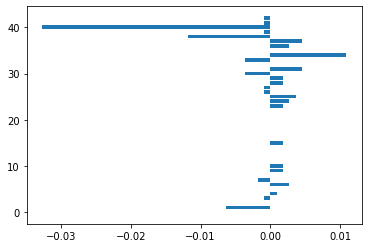

In [68]:
# Incluye a continuación todas las celdas de código y/o texto que consideres
# adecuadas para responder a la pregunta de este ejercicio.

# Suponiendo que yval es una serie o array de una dimensión
yval = pd.DataFrame(yval)
xval_trasnformado = pd.DataFrame(xval_trasnformado)

# Convertir 'Attrition' a valores numéricos (0 y 1)
#yval['Attrition'] = yval['Attrition'].replace({'No': 0, 'Yes': 1})

# Calcular la importancia de características mediante permutación
resultados = permutation_importance(modeloRL2, xval_trasnformado, np.ravel(yval), scoring='neg_mean_squared_error')

importance = resultados.importances_mean

for i,v in enumerate(importance):
 print('Factor: %0d, Coef-modelo: %.5f' % (i,v))

plt.barh([pd.DataFrame(xval_trasnformado).columns[x] for x in range(len(importance))], importance)
plt.show()

In [69]:
max_f = 5

# Indicamos el modelo que se usará para evaluar la importancia de los factores
# y la cantidad de ellos que se desean extraer:
fs = SelectFromModel(estimator=modeloRL2, max_features=max_f)
# ajustamos con  los datos de entrenamiento para determinar cuáles se consideran los más relevantes:
fs.fit(xval_trasnformado, np.ravel(yval))
# y ahora obtenemos los factores
factor_select = fs.get_support()

#obtenemos los factores de mayor relevancia:
Xval_fs = pd.DataFrame(xval_trasnformado)[pd.DataFrame(xval_trasnformado).columns[factor_select]]
Xval_fs.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,0,2,3,5,8
0,5.099020,4.123106,4.472136,0.000000,1.0
1,4.000000,4.000000,2.449490,0.000000,0.0
2,1.414214,3.464102,4.123106,2.000000,1.0
3,2.449490,3.741657,4.000000,1.414214,0.0
4,1.000000,4.582576,2.449490,1.000000,0.0


# **Ejercicio 17:**

#### **Finalmente, con base a todos los resultados obtenidos hasta ahora, responde a los siguientes incisos para obtener el que consideres el mejor modelo para enfrentar el problema de rotación de personal. Forma un nuevo conjunto de Entrenamiento con los conjuntos de entrenamiento y validación y utiliza el conjunto de Prueba (Test) para obtener el desempeño final de tu mejor modelo, desplegando la siguiente información:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)	Despliega la matriz de confusión y el reporte dado por la función classification_report() del conjunto de Prueba.**

Se muestra en el código de abajo

**b)	Incluye las conclusiones finales de la actividad. En particular interpreta y explica con base al problema de rotación de personal, los resultados obtenidos para las métricas “precision”, “recall” y “f1-score”.**

Omitiendo la métrica de Exactitud, la evalución nos indica que al menos el modelo logra predecir el 70% de los casos positivos, es decir, casos en el que los colabores renuncian, Sin embargo, el modelo tiende a equivocarse mucho al momento
de realizar la predicción,es decir hay falsas alarmas. Este fuerte contraste lo vemos impactado en el F1 Score que penaliza mucho a recall y por tanto el indicador disminuye, representando con esto una métrica un poco más segura para evaluar el modelo, en este caso, el modelo resulta ser de 45% de confianza para predecir los casos en los que los colabores renuncian.


++++++++ Termina la sección de agregar texto: ++++++++++++

In [70]:
#Particionamos 70% Train y 30% una temporal para volverla a dividir
Xtrain, Xtemp, ytrain, ytemp = train_test_split(X, y, train_size= 0.7, random_state = 2 )

#Particionamos el 30% en 50% validación y 50% en test.
Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp, train_size = 0.5 )

# Lo convertimos a Dataframe
Xtrain = pd.DataFrame(Xtrain)
Xval = pd.DataFrame(Xval)
Xtest = pd.DataFrame(Xtest)

# adecuadas para responder a la pregunta de este ejercicio.
BorderSMOTE = BorderlineSMOTE(sampling_strategy = 1, random_state = 3) # Nos ayudará a calcular los nuevos porcentajes de datos minoritarios vs mayoritarios.

#Transformamos las tablas tanto de entrenamiento como de prueba para aplicar Border Smote
pipelineCT = Pipeline(steps=[('CT', columnasTransformer)])
Xtrain_trasnformado = pipelineCT.fit_transform(Xtrain)
xval_trasnformado = pipelineCT.transform(Xval)
xtest_transformado = pipelineCT.transform(Xtest)

#Lo convertimos a Dataframe
Xtrain_trasnformado = pd.DataFrame(Xtrain_trasnformado)
xval_trasnformado = pd.DataFrame(xval_trasnformado)
xtest_transformado = pd.DataFrame(xtest_transformado)

#Entrenamiento para corregir muestras solo en dato de entrenamiento
Xtrain_BSM, ytrain_BSM = BorderSMOTE.fit_resample(Xtrain_trasnformado, ytrain)

#Obtenemos solo las columnas de mayor relevancia
columnas_relevantes = Xtrain_trasnformado.columns[factor_select]

Xtrain_BSM = Xtrain_BSM[columnas_relevantes]
xval_trasnformado = xval_trasnformado[columnas_relevantes]
xtest_transformado = xtest_transformado[columnas_relevantes]


#Ajustamos modelo de regresión logística
modeloRL2 = LogisticRegression(C= 10)
#Aplicamos el modelo sobre los datos de entrenamiento
modeloRL2.fit(Xtrain_BSM, np.ravel(ytrain_BSM))


print('accuracy-train-balanced', modeloRL2.score(Xtrain_BSM, ytrain_BSM))
print('accuracy-TEST-balanced', modeloRL2.score(xtest_transformado, ytest))

#con el modelo entrenamdo con balanceamos aplicamos sobre los datos de entrenamiento y validación para ver como se comporta.
y_pred_train = modeloRL2.predict(Xtrain_BSM)
y_pred_test = modeloRL2.predict(xtest_transformado)

print("RESULTADOS DE PRUEBA")
print(confusion_matrix(ytest, y_pred_test))

cm = confusion_matrix(ytest, y_pred_test)

from tabulate import tabulate

tabla = list()

tot = cm.sum()

vn = 100*cm[0,0] / tot
fp = 100*cm[0,1] / tot
fn = 100*cm[1,0] / tot
vp = 100*cm[1,1] / tot

precision = vp / ( vp+fp)
recall = vp / (vp+fn)
f1score = 2*vp / (2*vp+fp+fn)


print("PRECISION:",precision)
print("recall:",recall)
print("f1score:",f1score)

accuracy-train-balanced 0.697566628041715
accuracy-TEST-balanced 0.7601809954751131
RESULTADOS DE PRUEBA
[[138  41]
 [ 12  30]]
PRECISION: 0.4225352112676056
recall: 0.7142857142857143
f1score: 0.5309734513274336


# >> **Fin de la Actividad de las Semanas 3 y 4** <<